# Interpolação polinomial: funções de base de Newton

In [1]:
%matplotlib inline

Código gerador de funções de base de Newton de grau $n$ por computação simbólica.

In [2]:
from sympy import Symbol

def symbolic_vector(n,var):
    """Cria uma lista com n variáveis simbólicas.
    
        entrada:
            n: numero de pontos
            var: uma string (ex. 'x')
        saida:
            V: ['var0','var1',...,'varn-1']
    """
    if not isinstance(var,str):
        raise TypeError("{0} must be a string.".format(var))                 
        
    V = []
    for i in range(0,n):
        v = var + str(i)
        V.append(Symbol(v))
        
    return V

def N_nj(X,j):
    """ Calcula a função de base de Newton N_{n,j}(x). 
        
        entrada:
            X: um vetor contendo variáveis simbólicas
    """
    # pega a variavel base passada e converte para simbólica
    x = X[1]
    x = str(x)
    x = Symbol(x[0:-1])
    N = x/x;
    if j > 0: 
        for k in range(0,j):
            N *= (x - X[k])
            
    return N



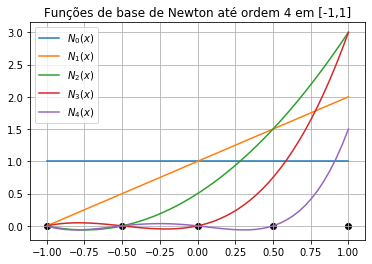

In [3]:
import numpy as np
import matplotlib.pyplot as plt 

# número de nós de interpolação: interpolação de (n-1)-ésimo grau
n = 5

# domínio de interpolação
x0,x1 = -1,1

# constroi vetor simbolico em x
X = symbolic_vector(n,'x')

# constroi pontos numericos 
xp = np.linspace(x0,x1,num=n,endpoint=True)

# cria malha numérica
xv = np.linspace(x0,x1)

# matriz das funções
Y = np.zeros((n,len(xv)))
for i in range(0,n):
    Y[i,] = np.zeros(np.shape(xv))

# montagem de dict para substituição: [xk,x0,x1,x2,...]
k = [str(i) for i in X]
k.insert(0,'x')

# preenche matriz
for i in range(0,Y.shape[0]):
    for j in range(0,np.size(xv)):
        v = list(np.concatenate([np.asarray([xv[j]]),xp]))
        d = dict(zip(k,v))
        Y[i,j] = N_nj(X,i).subs(d)

# plotagem das funções

# nós 
plt.scatter(xp,np.zeros(xp.shape),c= 'k')

leg = []
for i in range(0,Y.shape[0]):
    plt.plot(xv,Y[i,])
    s = '$N_{' + str(i) + '}(x)$'
    leg.append(s)
        
plt.grid()        
plt.legend(leg,loc='best')
plt.title('Funções de base de Newton até ordem ' + str(n-1) + ' em ['+str(x0)+','+str(x1)+']');

### Exemplo: 

Encontre o polinômio interpolador de Newton de ordem 1 $P_1(x)$ para a tabela abaixo

|x|y|
|-|-|
|-1|4|
|0|1|

Compute o valor de $P_1(0.35)$.

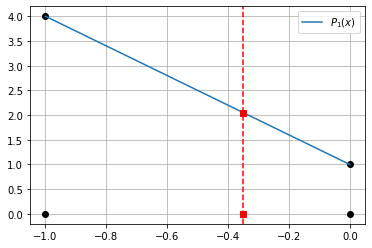

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# interpolação linear

# coeficiente a0 = y0
# coeficiente a1 = (y1-y0)/(x1-x0)

# pontos
x0,y0 = -1,4
x1,y1 =  0,1

# ordem 0
a0 = y0

# interpolador de Newton
a1 = (y1-y0)/(x1-x0)
P1 = lambda x: a0 + a1*(x-x0)

# ponto interpolado
xp = -0.35
yp = P1(xp)
yp

# plotagem

# nós
plt.plot([x0,x1],[0,0],'ok')

# valores nodais
plt.plot([x0,x1],[y0,y1],'ok')

# interpolador
x = np.linspace(x0,x1,30,endpoint=True)
plt.plot(x,P1(x),label='$P_1(x)$')

# ponto interpolado
plt.plot(xp,0,'sr')
plt.plot(xp,yp,'sr')
plt.axvline(xp,0,yp,c='r',ls='dashed')

plt.grid()
plt.legend(loc='best');

In [5]:
P1(xp)

2.05

### Exemplo: 

Encontre o polinômio interpolador de Newton de ordem 2 $P_2(x)$ para a tabela abaixo

|x|y|
|-|-|
|-1|4|
|0|1|
|2|-1|

Compute o valor de $P_2(0.35)$.

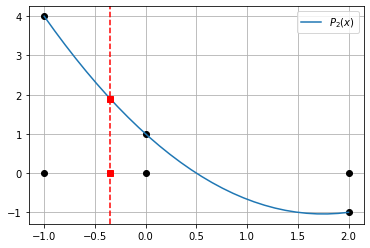

In [6]:
# interpolação quadrática

# Usando tabela DD: 
# https://vnicius.github.io/numbiosis/interpolador-newton/index.html


# par adicional 
x2,y2 = 2.,-1.

# coeficiente a2 = f[x0,x1,x2] = ( f[x1,x2] - f[x0,x1] ) / (x2 - x0)
# a2 = ( (y2-y1)/(x2-x1) - (y1-y0)/(x1-x0) )/(x2-x0)*(xx-x0)*(xx-x1)

# interpolador de Newton
P2 = lambda xx: P1(xx) + ( ( (y2-y1)/(x2-x1) - (y1-y0)/(x1-x0) )/(x2-x0) )*(xx-x0)*(xx-x1)


# ponto interpolado
yp = P2(xp)
yp

# plotagem

# nós
plt.plot([x0,x1,x2],[0,0,0],'ok')

# valores nodais
plt.plot([x0,x1,x2],[y0,y1,y2],'ok')

# interpolador
x = np.linspace(x0,x2,30,endpoint=True)
plt.plot(x,P2(x),label='$P_2(x)$')

# ponto interpolado
plt.plot(xp,0,'sr')
plt.plot(xp,yp,'sr')
plt.axvline(xp,0,yp,c='r',ls='dashed')

plt.grid()
plt.legend(loc='best');

In [7]:
P2(xp)

1.8983333333333332

### Exemplo: 

Encontre o polinômio interpolador de Newton de ordem 3 $P_3(x)$ para a tabela abaixo

|x|y|
|-|-|
|-1|4|
|0|1|
|2|-1|
|3|1|

Compute o valor de $P_3(0.35)$.

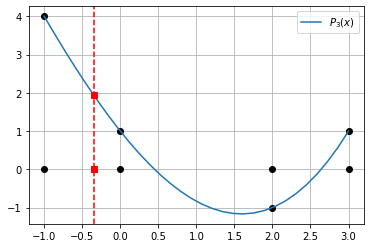

In [8]:
# interpolação quadrática

# Usando tabela DD: 
# https://vnicius.github.io/numbiosis/interpolador-newton/index.html


# par adicional 
x3,y3 = 3.,1.

# coeficiente a3 = f[x0,x1,x2,x3] 

# interpolador de Newton
P3 = lambda xxx: P2(xxx) + 1/12*(xxx-x0)*(xxx-x1)*(xxx-x2)


# ponto interpolado
yp = P3(xp)
yp

# plotagem

# nós
plt.plot([x0,x1,x2,x3],[0,0,0,0],'ok')

# valores nodais
plt.plot([x0,x1,x2,x3],[y0,y1,y2,y3],'ok')

# interpolador
x = np.linspace(x0,x3,30,endpoint=True)
plt.plot(x,P3(x),label='$P_3(x)$')

# ponto interpolado
plt.plot(xp,0,'sr')
plt.plot(xp,yp,'sr')
plt.axvline(xp,0,yp,c='r',ls='dashed')

plt.grid()
plt.legend(loc='best');

In [9]:
P3(-0.35)

1.9428854166666665

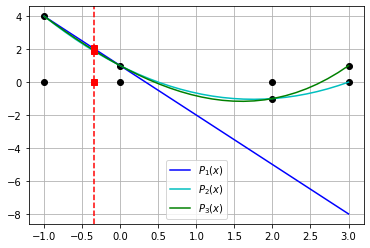

In [10]:
# ponto interpolado
YP = [P1(xp),P2(xp),P3(xp)]

# plotagem
# nós
plt.plot([x0,x1,x2,x3],[0,0,0,0],'ok')

# valores nodais
plt.plot([x0,x1,x2,x3],[y0,y1,y2,y3],'ok')

# interpoladores
x = np.linspace(x0,x3,30,endpoint=True)
plt.plot(x,P1(x),'b',label='$P_1(x)$')
plt.plot(x,P2(x),'c',label='$P_2(x)$')
plt.plot(x,P3(x),'g',label='$P_3(x)$')

# ponto interpolado
plt.plot(xp,0,'sr')
plt.plot([xp,xp,xp],YP,'sr')
plt.axvline(xp,0,max(YP),c='r',ls='dashed')

plt.grid()
plt.legend(loc='best');

## Comparação (zoom)

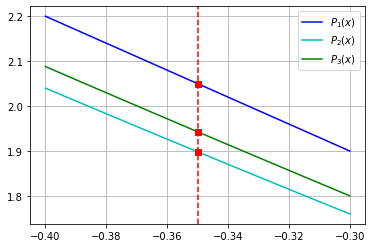

In [11]:
# interpoladores
x = np.linspace(-0.4,-0.3,30,endpoint=True)
plt.plot(x,P1(x),'b',label='$P_1(x)$')
plt.plot(x,P2(x),'c',label='$P_2(x)$')
plt.plot(x,P3(x),'g',label='$P_3(x)$')

# ponto interpolado
plt.plot([xp,xp,xp],YP,'sr')
plt.axvline(xp,0,max(YP),c='r',ls='dashed')

plt.grid()
plt.legend(loc='best');

In [12]:
from IPython.core.display import HTML

def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling();